In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
df = pd.read_csv('/content/Expanded_data_with_more_features.csv')

In [3]:
print(df.head())

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

In [4]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,10926.000000,10361.000000,10925.000000,10925.000000,10925.000000
mean,489.503020,2.128849,66.690892,69.460503,68.474600
std,287.116158,1.472692,15.441569,14.726545,15.426163
min,0.000000,0.000000,0.000000,11.000000,6.000000
25%,242.000000,1.000000,56.000000,59.000000,58.000000
50%,483.500000,2.000000,67.000000,70.000000,69.000000
75%,736.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10926 entries, 0 to 10925
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           10926 non-null  int64  
 1   Gender               10926 non-null  object 
 2   EthnicGroup          10267 non-null  object 
 3   ParentEduc           10274 non-null  object 
 4   LunchType            10926 non-null  object 
 5   TestPrep             10269 non-null  object 
 6   ParentMaritalStatus  10492 non-null  object 
 7   PracticeSport        10704 non-null  object 
 8   IsFirstChild         10567 non-null  object 
 9   NrSiblings           10361 non-null  float64
 10  TransportMeans       9793 non-null   object 
 11  WklyStudyHours       10588 non-null  object 
 12  MathScore            10925 non-null  float64
 13  ReadingScore         10925 non-null  float64
 14  WritingScore         10925 non-null  float64
dtypes: float64(4), int64(1), object(10)


In [62]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup             659
ParentEduc              652
LunchType                 0
TestPrep                657
ParentMaritalStatus     434
PracticeSport           222
IsFirstChild            359
NrSiblings              565
TransportMeans         1133
WklyStudyHours          338
MathScore                 1
ReadingScore              1
WritingScore              1
dtype: int64

In [75]:
#Drop unnamed column
df = df.drop('Unnamed: 0', axis=1)
print(df.head())

   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5       71.0          71.0          74.0  


In [76]:
df.dropna(inplace=True)
df.isnull().sum()

Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6831 entries, 2 to 10923
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               6831 non-null   object 
 1   EthnicGroup          6831 non-null   object 
 2   ParentEduc           6831 non-null   object 
 3   LunchType            6831 non-null   object 
 4   TestPrep             6831 non-null   object 
 5   ParentMaritalStatus  6831 non-null   object 
 6   PracticeSport        6831 non-null   object 
 7   IsFirstChild         6831 non-null   object 
 8   NrSiblings           6831 non-null   float64
 9   TransportMeans       6831 non-null   object 
 10  WklyStudyHours       6831 non-null   object 
 11  MathScore            6831 non-null   float64
 12  ReadingScore         6831 non-null   float64
 13  WritingScore         6831 non-null   float64
dtypes: float64(4), object(10)
memory usage: 800.5+ KB


In [77]:
#Change weekly study hour column
df['WklyStudyHours'] = df['WklyStudyHours'].str.replace('05-Oct', '05-10')
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87.0,93.0,91.0
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,05-10,76.0,78.0,75.0
5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,05-10,73.0,84.0,79.0
6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,05-10,85.0,93.0,89.0
7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41.0,43.0,39.0


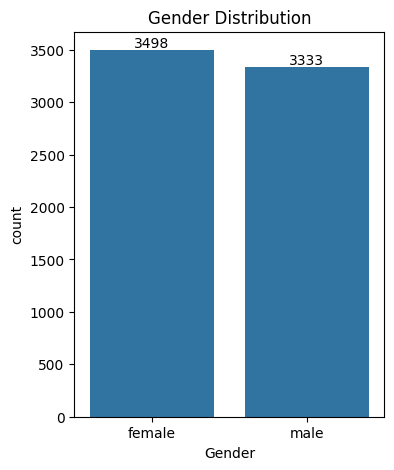

In [28]:
#Gender Distribution
plt.figure(figsize=(4,5))
ax = sns.countplot(x='Gender', data=df)
ax.bar_label(ax.containers[0])
plt.title("Gender Distribution")
plt.show()

In [ ]:
#from the above chart we have analysed the number of female is more than number of males

In [20]:
#Impact of parent education on students score
gb = df.groupby('ParentEduc').agg({'MathScore': 'mean', 'ReadingScore': 'mean', 'WritingScore': 'mean'})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.387847     71.369092     70.603151
bachelor's degree   70.430825     73.243932     73.510922
high school         64.054531     67.038402     65.016129
master's degree     72.019493     75.711501     76.450292
some college        66.554974     69.017670     68.319372
some high school    62.869271     65.978212     64.021037


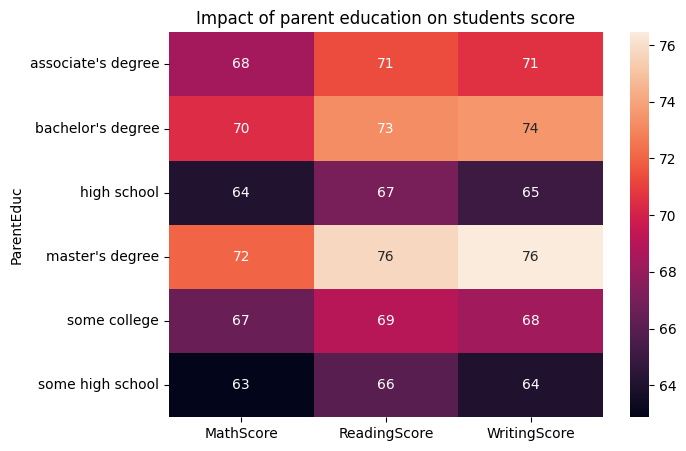

In [29]:
plt.figure(figsize=(7,5))
sns.heatmap(gb, annot=True)
plt.title("Impact of parent education on students score")
plt.show()

In [ ]:
#from above chart we concluded that Education of parents have good impack on the Children score

In [26]:
#Impact of parent Marital Status on students score
gb1 = df.groupby('ParentMaritalStatus').agg({'MathScore': 'mean', 'ReadingScore': 'mean', 'WritingScore': 'mean'})
print(gb1)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.470790     69.786942     68.914089
married              66.728081     69.513088     68.387039
single               65.978180     69.093516     68.337905
widowed              71.406250     72.625000     72.093750


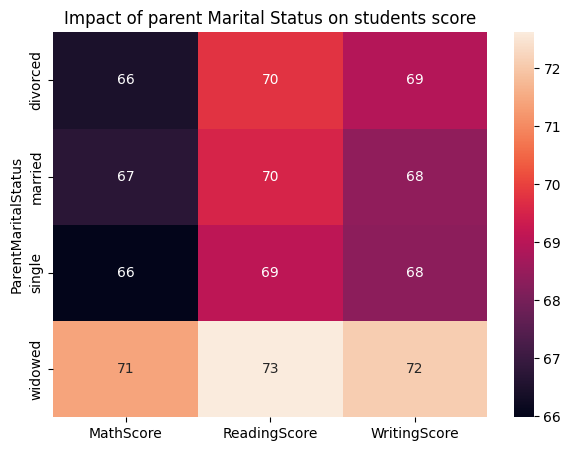

In [30]:
plt.figure(figsize=(7,5))
sns.heatmap(gb1, annot=True)
plt.title("Impact of parent Marital Status on students score")
plt.show()

In [ ]:
#fROM THE Above chart we can conclude that Marital Status doesnt have much impact on the student score

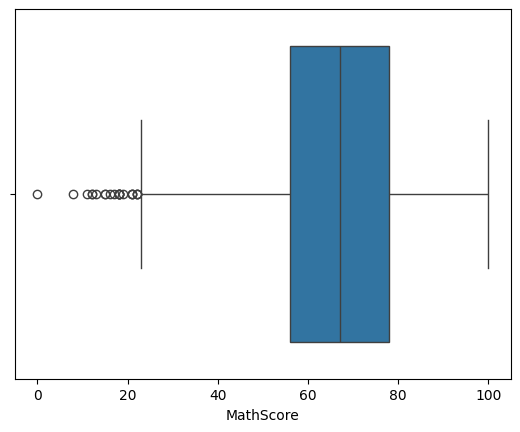

In [31]:
sns.boxplot(x='MathScore', data=df)
plt.show()

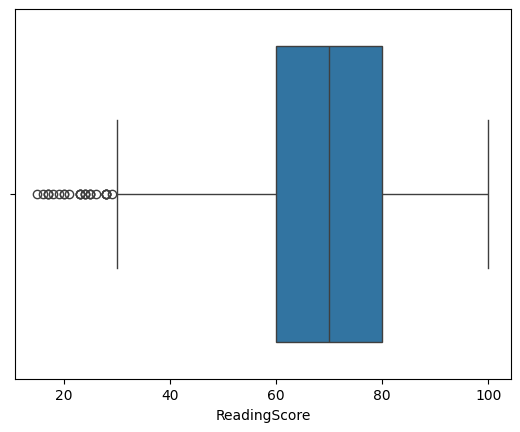

In [32]:
sns.boxplot(x='ReadingScore', data=df)
plt.show()

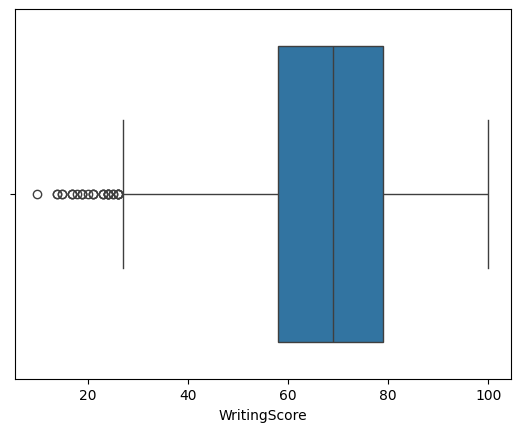

In [33]:
sns.boxplot(x='WritingScore', data=df)
plt.show()

In [34]:
print(df['EthnicGroup'].unique())

['group B' 'group C' 'group D' 'group A' 'group E']


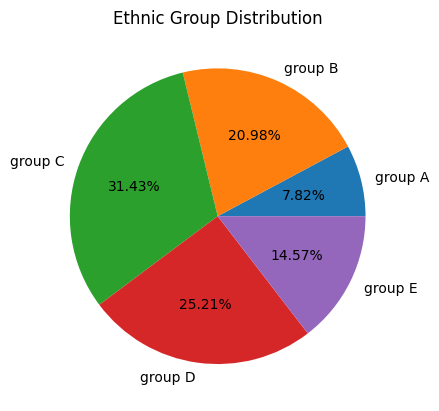

In [40]:
groupA = df.loc[df['EthnicGroup'] == 'group A'].count()
groupB = df.loc[df['EthnicGroup'] == 'group B'].count()
groupC = df.loc[df['EthnicGroup'] == 'group C'].count()
groupD = df.loc[df['EthnicGroup'] == 'group D'].count()
groupE = df.loc[df['EthnicGroup'] == 'group E'].count()
plt.title("Ethnic Group Distribution")
plt.pie([groupA[0], groupB[0], groupC[0], groupD[0], groupE[0]], labels=['group A', 'group B', 'group C', 'group D', 'group E'], autopct='%1.2f%%')
plt.show()

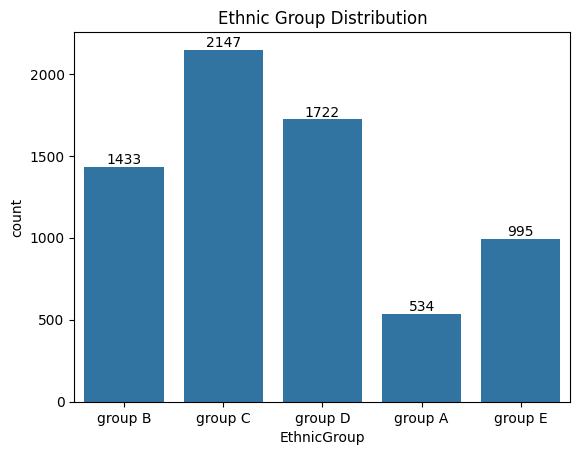

In [42]:
ax = sns.countplot(x='EthnicGroup', data=df)
ax.bar_label(ax.containers[0])
plt.title("Ethnic Group Distribution")
plt.show()

In [78]:
df['WeeklyStudyHours'] = df['WklyStudyHours'].str.extract('(\d+)').astype(int)
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,WeeklyStudyHours
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87.0,93.0,91.0,5
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,05-10,76.0,78.0,75.0,5
5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,05-10,73.0,84.0,79.0,5
6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,05-10,85.0,93.0,89.0,5
7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41.0,43.0,39.0,10


In [79]:
df['TestPrep'] = df['TestPrep'].map({'completed': 1, 'none': 0})
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,WeeklyStudyHours
2,female,group B,master's degree,standard,0,single,sometimes,yes,4.0,school_bus,< 5,87.0,93.0,91.0,5
4,male,group C,some college,standard,0,married,sometimes,yes,0.0,school_bus,05-10,76.0,78.0,75.0,5
5,female,group B,associate's degree,standard,0,married,regularly,yes,1.0,school_bus,05-10,73.0,84.0,79.0,5
6,female,group B,some college,standard,1,widowed,never,no,1.0,private,05-10,85.0,93.0,89.0,5
7,male,group B,some college,free/reduced,0,married,sometimes,yes,1.0,private,> 10,41.0,43.0,39.0,10


In [80]:
df['IsFirstChild'] = df['IsFirstChild'].map({'yes': 1, 'no': 0})
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,WeeklyStudyHours
2,female,group B,master's degree,standard,0,single,sometimes,1,4.0,school_bus,< 5,87.0,93.0,91.0,5
4,male,group C,some college,standard,0,married,sometimes,1,0.0,school_bus,05-10,76.0,78.0,75.0,5
5,female,group B,associate's degree,standard,0,married,regularly,1,1.0,school_bus,05-10,73.0,84.0,79.0,5
6,female,group B,some college,standard,1,widowed,never,0,1.0,private,05-10,85.0,93.0,89.0,5
7,male,group B,some college,free/reduced,0,married,sometimes,1,1.0,private,> 10,41.0,43.0,39.0,10


In [82]:
df['LunchType'] = df['LunchType'].map({'standard': 1, 'free/reduced': 0})
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,WeeklyStudyHours
2,female,group B,master's degree,1,0,single,sometimes,1,4.0,school_bus,< 5,87.0,93.0,91.0,5
4,male,group C,some college,1,0,married,sometimes,1,0.0,school_bus,05-10,76.0,78.0,75.0,5
5,female,group B,associate's degree,1,0,married,regularly,1,1.0,school_bus,05-10,73.0,84.0,79.0,5
6,female,group B,some college,1,1,widowed,never,0,1.0,private,05-10,85.0,93.0,89.0,5
7,male,group B,some college,0,0,married,sometimes,1,1.0,private,> 10,41.0,43.0,39.0,10


In [83]:
df['Gender'] = df['Gender'].map({'male': 1, 'female': 0})
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,WeeklyStudyHours
2,0,group B,master's degree,1,0,single,sometimes,1,4.0,school_bus,< 5,87.0,93.0,91.0,5
4,1,group C,some college,1,0,married,sometimes,1,0.0,school_bus,05-10,76.0,78.0,75.0,5
5,0,group B,associate's degree,1,0,married,regularly,1,1.0,school_bus,05-10,73.0,84.0,79.0,5
6,0,group B,some college,1,1,widowed,never,0,1.0,private,05-10,85.0,93.0,89.0,5
7,1,group B,some college,0,0,married,sometimes,1,1.0,private,> 10,41.0,43.0,39.0,10


In [84]:
df['PracticeSport'] = df['PracticeSport'].map({'regularly': 1, 'never': 0, 'sometimes': 1})
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,WeeklyStudyHours
2,0,group B,master's degree,1,0,single,1,1,4.0,school_bus,< 5,87.0,93.0,91.0,5
4,1,group C,some college,1,0,married,1,1,0.0,school_bus,05-10,76.0,78.0,75.0,5
5,0,group B,associate's degree,1,0,married,1,1,1.0,school_bus,05-10,73.0,84.0,79.0,5
6,0,group B,some college,1,1,widowed,0,0,1.0,private,05-10,85.0,93.0,89.0,5
7,1,group B,some college,0,0,married,1,1,1.0,private,> 10,41.0,43.0,39.0,10


In [85]:
df['TransportMeans'] = df['TransportMeans'].map({'private': 1, 'school_bus': 0})
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,WeeklyStudyHours
2,0,group B,master's degree,1,0,single,1,1,4.0,0,< 5,87.0,93.0,91.0,5
4,1,group C,some college,1,0,married,1,1,0.0,0,05-10,76.0,78.0,75.0,5
5,0,group B,associate's degree,1,0,married,1,1,1.0,0,05-10,73.0,84.0,79.0,5
6,0,group B,some college,1,1,widowed,0,0,1.0,1,05-10,85.0,93.0,89.0,5
7,1,group B,some college,0,0,married,1,1,1.0,1,> 10,41.0,43.0,39.0,10


In [86]:
# Select only the numerical columns before calculating correlations
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()
print(correlation_matrix)

                    Gender  LunchType  TestPrep  PracticeSport  IsFirstChild  \
Gender            1.000000   0.009443 -0.006246      -0.007296      0.001193   
LunchType         0.009443   1.000000  0.000897      -0.017029      0.015240   
TestPrep         -0.006246   0.000897  1.000000       0.012618      0.024882   
PracticeSport    -0.007296  -0.017029  0.012618       1.000000      0.010610   
IsFirstChild      0.001193   0.015240  0.024882       0.010610      1.000000   
NrSiblings        0.001778   0.007063 -0.016746      -0.015865     -0.132403   
TransportMeans   -0.023266  -0.007933  0.022176      -0.020308     -0.002010   
MathScore         0.164452   0.376355  0.123627       0.057804      0.004640   
ReadingScore     -0.236107   0.262911  0.201152       0.028074      0.006239   
WritingScore     -0.283385   0.276779  0.282030       0.049912      0.001725   
WeeklyStudyHours -0.000666   0.002001 -0.005201      -0.027612     -0.026380   

                  NrSiblings  Transport

In [95]:
df.drop(['EthnicGroup', 'ParentMaritalStatus', 'ParentEduc', 'WklyStudyHours'], axis=1, inplace=True)

KeyError: "['EthnicGroup', 'ParentMaritalStatus', 'ParentEduc'] not found in axis"

In [97]:
df.drop(['WklyStudyHours'], axis=1, inplace=True)

In [98]:
df.head()

,Gender,LunchType,TestPrep,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,MathScore,ReadingScore,WritingScore,WeeklyStudyHours
2,0,1,0,1,1,4.0,0,87.0,93.0,91.0,5
4,1,1,0,1,1,0.0,0,76.0,78.0,75.0,5
5,0,1,0,1,1,1.0,0,73.0,84.0,79.0,5
6,0,1,1,0,0,1.0,1,85.0,93.0,89.0,5
7,1,0,0,1,1,1.0,1,41.0,43.0,39.0,10


In [112]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [115]:
sc.fit(df)

StandardScaler()

In [114]:
df.head()

,Gender,LunchType,TestPrep,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,MathScore,ReadingScore,WritingScore,WeeklyStudyHours
2,0,1,0,1,1,4.0,0,87.0,93.0,91.0,5
4,1,1,0,1,1,0.0,0,76.0,78.0,75.0,5
5,0,1,0,1,1,1.0,0,73.0,84.0,79.0,5
6,0,1,1,0,0,1.0,1,85.0,93.0,89.0,5
7,1,0,0,1,1,1.0,1,41.0,43.0,39.0,10


In [116]:
X=df.drop(['MathScore','ReadingScore','WritingScore'],axis=1)
y=df[['MathScore','ReadingScore','WritingScore']]

In [117]:
!pip install scikit-learn
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
from sklearn.linear_model import LinearRegression # import LinearRegression

lr = LinearRegression()
lr.fit(train_X,train_y)

LinearRegression()

In [118]:
pred_y = lr.predict(test_X)
print(pred_y)

[[71.66558136 66.61404043 63.97047413]
 [71.69094145 66.45137652 63.97668664]
 [58.62704516 71.18919317 72.52064405]
 ...
 [75.29661747 72.41139676 72.84491176]
 [59.65946483 58.14042065 54.81001072]
 [66.98272399 73.32060211 72.52804929]]


In [119]:
score = lr.score(test_X,test_y)
print(score)

0.21780824322942424


In [121]:
score= lr.score(train_X,train_y)
print(score)

0.19633090927594185
